In [144]:
import requests
from collections import defaultdict
import re
import networkx as nx

In [145]:
# r = requests.get('https://baike.baidu.com/item/北京地铁1号线')

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36',
    'Connection': 'keep-alive',
    'Host': 'baike.baidu.com',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'zh-CN,zh;q=0.8,en-US;q=0.5,en;q=0.3',
    'Upgrade-Insecure-Requests': '1'
}

r = requests.get('https://baike.baidu.com/item/北京地铁1号线',headers=headers)


In [146]:
headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}

url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
r = requests.get(url, headers=headers).content.decode('utf8')

In [147]:
from bs4 import BeautifulSoup
soup_string = BeautifulSoup(r, "html.parser")

In [148]:
table = soup_string.findAll('table')[3]

In [149]:
all_a = table.find_all('a')

In [150]:
baidu_wiki_url='https://baike.baidu.com'

In [151]:
def get_href(content):
    dict={}
    for item in content:
        if item.has_attr('href'):
            dict[item.text]= baidu_wiki_url + item.attrs['href']
    return dict

In [152]:
subways_href = get_href(all_a)

In [153]:
del subways_href["北京地铁大兴线"]

In [154]:
def get_wiki_content(url):
    rr=requests.get(url,headers=headers).content.decode('utf-8')
    soup_string1 = BeautifulSoup(rr, "html.parser")
    return soup_string1

In [155]:
subways_href

{'北京地铁1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '北京地铁2号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
 '北京地铁4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '北京地铁5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '北京地铁6号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 '北京地铁7号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
 '北京地铁8号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '北京地铁9号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 '北京地铁10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '北京地铁13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%B

In [156]:
#rr=requests.get(subways_href['北京地铁4号线'],headers=headers).content.decode('utf-8')

In [157]:
#soup_string1 = BeautifulSoup(rr, "html.parser")

In [158]:
# for child in soup_string1.findAll('table')[1]:
#     #print(child)
#     for childitem in child:
#         print(childitem)
#     print('\n')

In [159]:
# def get_subways_station(content):
#     station = []
#     subtable = content.findAll('table')[1]
#     print(subtable)
#     sub_all_tr = subtable.findAll('tr')
#     for item in sub_all_tr:
#         station.append(item.findAll('td')[1].text.strip())
#     return station

In [160]:
def get_regex_name(str):
    return re.findall(u"[\u4e00-\u9fa5]+",str)[0]

In [161]:
def get_subways_station(content,subname):
    for item in content.findAll('table'):
        all_tr = item.findAll('tr')
        subway_list = []
        for th_n in range(len(all_tr[0].findAll('th'))):
            if all_tr[0].findAll('th')[th_n].find(text=(u"车站名称")):
                for tr_n in range(len(all_tr)):
                    if tr_n == 0 :continue
                    td_content = all_tr[tr_n].findAll('td')
                    if td_content:
                        if subname == '北京地铁10号线' or subname == '北京地铁4号线':
                            subway_list.append(get_regex_name(td_content[th_n-1].text))
                        else :
                            subway_list.append(get_regex_name(td_content[th_n].text))
                return subway_list
        for td_n in range(len(all_tr[0].findAll('td'))):
            if all_tr[0].findAll('td')[td_n].find(text=(u"车站名称")):
                for tr_n in range(len(all_tr)):
                    if tr_n == 0 :continue
                    td_content = all_tr[tr_n].findAll('td')
                    if td_content:
                        subway_list.append(get_regex_name(td_content[td_n].text))
                return subway_list
        

In [162]:
all_subways = {}

In [163]:
def get_all_subways_station(subways):
    subways_dict = {}
    for item in subways:
        soup_content  = get_wiki_content(subways[item])
        one_subways = get_subways_station(soup_content,item)
        print(one_subways)
        subways_dict[item]=one_subways
    return subways_dict

In [164]:
all_subways = get_all_subways_station(subways_href)

['黑石头站', '高井站', '福寿岭站', '苹果园站', '古城站', '八角游乐园站', '八宝山站', '玉泉路站', '五棵松站', '万寿路站', '公主坟站', '军事博物馆站', '木樨地站', '南礼士路站', '复兴门站', '西单站', '天安门西站', '天安门东站', '王府井站', '东单站', '建国门站', '永安里站', '国贸站', '大望路站', '四惠站', '四惠东站']
['西直门站', '积水潭站', '鼓楼大街站', '安定门站', '雍和宫站', '东直门站', '东四十条站', '朝阳门站', '建国门站', '北京站', '崇文门站', '前门站', '和平门站', '宣武门站', '长椿街站', '复兴门站', '阜成门站', '车公庄站', '西直门站']
['天宫院站', '生物医药基地站', '义和庄站', '黄村火车站', '黄村西大街站', '清源路站', '枣园站', '高米店南站', '高米店北站', '西红门站', '新宫站', '公益西桥站', '角门西站', '马家堡站', '北京南站', '陶然亭站', '菜市口站', '宣武门站', '西单站', '灵境胡同站', '西四站', '平安里站', '新街口站', '西直门站', '动物园站', '国家图书馆站', '魏公村站', '人民大学站', '海淀黄庄站', '中关村站', '北京大学东门站', '圆明园站', '西苑站', '北宫门站', '安河桥北站']
['宋家庄站', '刘家窑站', '蒲黄榆站', '天坛东门站', '磁器口站', '崇文门站', '东单站', '灯市口站', '东四站', '张自忠路站', '北新桥站', '雍和宫站', '和平里北街站', '和平西桥站', '惠新西街南口站', '惠新西街北口站', '大屯路东站', '北苑路北站', '立水桥南站', '立水桥站', '天通苑南站', '天通苑站', '天通苑北站', '远期规划至小汤山']
['金安桥站', '苹果园站', '苹果园南路站', '西黄村站', '廖公庄站', '田村站', '海淀五路居站', '慈寿寺站', '花园桥站', '白石桥南站', '二里沟站', '车公庄西站', '车公庄站', '平安里站', '北海北站', '南锣鼓巷站

In [165]:
all_subways

{'北京地铁1号线': ['黑石头站',
  '高井站',
  '福寿岭站',
  '苹果园站',
  '古城站',
  '八角游乐园站',
  '八宝山站',
  '玉泉路站',
  '五棵松站',
  '万寿路站',
  '公主坟站',
  '军事博物馆站',
  '木樨地站',
  '南礼士路站',
  '复兴门站',
  '西单站',
  '天安门西站',
  '天安门东站',
  '王府井站',
  '东单站',
  '建国门站',
  '永安里站',
  '国贸站',
  '大望路站',
  '四惠站',
  '四惠东站'],
 '北京地铁2号线': ['西直门站',
  '积水潭站',
  '鼓楼大街站',
  '安定门站',
  '雍和宫站',
  '东直门站',
  '东四十条站',
  '朝阳门站',
  '建国门站',
  '北京站',
  '崇文门站',
  '前门站',
  '和平门站',
  '宣武门站',
  '长椿街站',
  '复兴门站',
  '阜成门站',
  '车公庄站',
  '西直门站'],
 '北京地铁4号线': ['天宫院站',
  '生物医药基地站',
  '义和庄站',
  '黄村火车站',
  '黄村西大街站',
  '清源路站',
  '枣园站',
  '高米店南站',
  '高米店北站',
  '西红门站',
  '新宫站',
  '公益西桥站',
  '角门西站',
  '马家堡站',
  '北京南站',
  '陶然亭站',
  '菜市口站',
  '宣武门站',
  '西单站',
  '灵境胡同站',
  '西四站',
  '平安里站',
  '新街口站',
  '西直门站',
  '动物园站',
  '国家图书馆站',
  '魏公村站',
  '人民大学站',
  '海淀黄庄站',
  '中关村站',
  '北京大学东门站',
  '圆明园站',
  '西苑站',
  '北宫门站',
  '安河桥北站'],
 '北京地铁5号线': ['宋家庄站',
  '刘家窑站',
  '蒲黄榆站',
  '天坛东门站',
  '磁器口站',
  '崇文门站',
  '东单站',
  '灯市口站',
  '东四站',
  '张自忠路站',
  '北新桥站',
  '雍和宫站',
  '和平里北街站',
  '和平西桥

In [166]:
all_subways_dict = defaultdict(list)

In [167]:
def list_add_element(olist,value):
    if value not in olist:
        olist.append(value)
    return olist

In [168]:
for item in all_subways:
    for i in range(len(all_subways[item])):
        if i==0: 
            #all_subways_dict[all_subways[item][i]].append(all_subways[item][i+1])
            all_subways_dict[all_subways[item][i]]=list_add_element(all_subways_dict[all_subways[item][i]],all_subways[item][i+1])
        elif i==len(all_subways[item])-1: 
            all_subways_dict[all_subways[item][i]]=list_add_element(all_subways_dict[all_subways[item][i]],all_subways[item][i-1])
        else:             
            all_subways_dict[all_subways[item][i]]=list_add_element(all_subways_dict[all_subways[item][i]],all_subways[item][i-1])
            all_subways_dict[all_subways[item][i]]=list_add_element(all_subways_dict[all_subways[item][i]],all_subways[item][i+1])
            

In [169]:
all_subways_dict

defaultdict(list,
            {'黑石头站': ['高井站'],
             '高井站': ['黑石头站', '福寿岭站'],
             '福寿岭站': ['高井站', '苹果园站'],
             '苹果园站': ['福寿岭站', '古城站', '金安桥站', '苹果园南路站'],
             '古城站': ['苹果园站', '八角游乐园站'],
             '八角游乐园站': ['古城站', '八宝山站'],
             '八宝山站': ['八角游乐园站', '玉泉路站'],
             '玉泉路站': ['八宝山站', '五棵松站'],
             '五棵松站': ['玉泉路站', '万寿路站'],
             '万寿路站': ['五棵松站', '公主坟站'],
             '公主坟站': ['万寿路站', '军事博物馆站', '莲花桥站', '西钓鱼台站'],
             '军事博物馆站': ['公主坟站', '木樨地站', '北京西站', '白堆子站'],
             '木樨地站': ['军事博物馆站', '南礼士路站', '达官营站', '玉渊潭东门站'],
             '南礼士路站': ['木樨地站', '复兴门站'],
             '复兴门站': ['南礼士路站', '西单站', '长椿街站', '阜成门站'],
             '西单站': ['复兴门站', '天安门西站', '宣武门站', '灵境胡同站'],
             '天安门西站': ['西单站', '天安门东站'],
             '天安门东站': ['天安门西站', '王府井站'],
             '王府井站': ['天安门东站', '东单站', '金鱼胡同站', '前门站'],
             '东单站': ['王府井站', '建国门站', '崇文门站', '灯市口站'],
             '建国门站': ['东单站', '永安里站', '朝阳门站', '北京站'],
             

In [170]:
subway_connection_grath = nx.Graph(all_subways_dict)

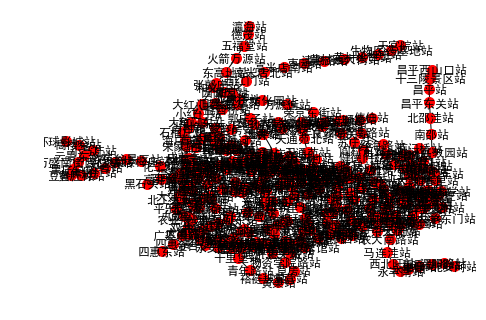

In [171]:
nx.draw(subway_connection_grath, with_labels=True,node_size = 100)

In [172]:
def get_successor(frontier,grath):
    return grath[frontier]

In [173]:
def sort_pathes(pathes,func,beam):
    return sorted(pathes,key=func)[:beam]

In [174]:
def min_station(pathes):
    return sorted(pathes,key=lambda n:len(pathes))

In [175]:
def search_destination(grath,start,get_successor,is_goal,strategy_func):
    pathes = [[start]]
    seen = set()
    choosen_path = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        #print(get_successor(frontier,grath))
        if frontier in seen:continue
        for station in get_successor(frontier,grath):
            print('station:{}'.format(station))
            if station in path: continue
            new_path = path + [station]
            pathes.append(new_path)
            #print(pathes)
            if is_goal(station): return new_path
        pathes=strategy_func(pathes)
        #print (pathes)
        seen.add(frontier)
        print('seen:{}'.format(seen))
    return choosen_path

In [178]:
search_destination(subway_connection_grath,'苏州街站',get_successor,lambda n : n == '西单站',min_station)

station:海淀黄庄站
station:巴沟站
station:苏州桥站
station:万泉河桥站
seen:{'苏州街站'}
station:人民大学站
station:中关村站
station:苏州街站
station:知春里站
seen:{'苏州街站', '海淀黄庄站'}
station:苏州街站
station:火器营站
seen:{'巴沟站', '苏州街站', '海淀黄庄站'}
station:苏州街站
station:万寿寺站
seen:{'巴沟站', '苏州桥站', '苏州街站', '海淀黄庄站'}
station:西苑站
station:苏州街站
seen:{'巴沟站', '海淀黄庄站', '苏州街站', '万泉河桥站', '苏州桥站'}
station:魏公村站
station:海淀黄庄站
seen:{'巴沟站', '海淀黄庄站', '苏州街站', '万泉河桥站', '人民大学站', '苏州桥站'}
station:海淀黄庄站
station:北京大学东门站
seen:{'巴沟站', '中关村站', '海淀黄庄站', '苏州街站', '万泉河桥站', '人民大学站', '苏州桥站'}
station:海淀黄庄站
station:知春路站
seen:{'巴沟站', '中关村站', '海淀黄庄站', '苏州街站', '万泉河桥站', '人民大学站', '苏州桥站', '知春里站'}
station:巴沟站
station:长春桥站
seen:{'巴沟站', '中关村站', '海淀黄庄站', '苏州街站', '万泉河桥站', '火器营站', '人民大学站', '苏州桥站', '知春里站'}
station:国家图书馆站
station:苏州桥站
seen:{'巴沟站', '中关村站', '海淀黄庄站', '苏州街站', '万寿寺站', '万泉河桥站', '火器营站', '人民大学站', '苏州桥站', '知春里站'}
station:圆明园站
station:北宫门站
station:万泉河桥站
station:农大南路站
seen:{'巴沟站', '中关村站', '海淀黄庄站', '苏州街站', '万寿寺站', '万泉河桥站', '西苑站', '火器营站', '人民大学站', '苏州桥站', '知春里站'}
station:国家图书馆站
stat

['苏州街站',
 '苏州桥站',
 '万寿寺站',
 '国家图书馆站',
 '动物园站',
 '西直门站',
 '车公庄站',
 '阜成门站',
 '复兴门站',
 '西单站']

## 

In [179]:
def get_bjsubways_dict(all_subways):
    all_bjsubways_dict = defaultdict(dict)
    for item in all_subways:
        for i in range(len(all_subways[item])):
            connect_stations = {}
            if i==0:
                connect_stations[all_subways[item][i+1]]= item
            elif i==len(all_subways[item])-1:
                connect_stations[all_subways[item][i-1]]= item
            else:             
                connect_stations[all_subways[item][i-1]]=item
                connect_stations[all_subways[item][i+1]]=item
            all_bjsubways_dict[all_subways[item][i]].update(connect_stations)
    return all_bjsubways_dict

In [180]:
all_bjsubways_dict=get_bjsubways_dict(all_subways)

In [181]:
subway_connection_grath2 = nx.Graph(all_bjsubways_dict)

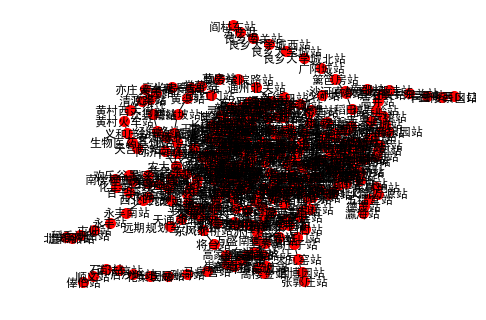

In [182]:
nx.draw(subway_connection_grath2, with_labels=True,node_size = 100)

In [183]:
def search_path_by_min_station(graph,start,destination):
    pathes = [[start]]
    seen = set()
    choosen_path = {}
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        for station,line in get_successor(frontier,graph).items():
            new_path = path + [line,station]
            if destination==station: return new_path
            else : pathes.append(new_path)
        pathes = min_station(pathes)
        seen.add(frontier)
    return choosen_path

In [185]:
def search_path_by_min_change_station(graph,start,destination):
    pathes = [[start,'',0]]
    seen = set()
    choosen_path = {}
    while pathes:
        path = pathes.pop(0)
        frontier = path[-3]
        if frontier in seen: continue
        for station,next_line in get_successor(frontier,graph).items():
            line = path[-2]
            change_num = path[-1]
            if line != next_line:
                change_num +=1
            new_path = path[:-2] + [next_line,station,next_line,change_num]
            if destination==station: return new_path
            else : pathes.append(new_path)
        pathes.sort(key=lambda n:n[-1])
        seen.add(frontier)
    return choosen_path

In [184]:
search_path_by_min_station(all_bjsubways_dict,'苏州街站','西单站')

['苏州街站',
 '北京地铁16号线',
 '苏州桥站',
 '北京地铁16号线',
 '万寿寺站',
 '北京地铁16号线',
 '国家图书馆站',
 '北京地铁4号线',
 '动物园站',
 '北京地铁4号线',
 '西直门站',
 '北京地铁2号线',
 '车公庄站',
 '北京地铁2号线',
 '阜成门站',
 '北京地铁2号线',
 '复兴门站',
 '北京地铁1号线',
 '西单站']

In [186]:
search_path_by_min_change_station(all_bjsubways_dict,'苏州街站','西单站')

['苏州街站',
 '北京地铁16号线',
 '苏州桥站',
 '北京地铁16号线',
 '万寿寺站',
 '北京地铁16号线',
 '国家图书馆站',
 '北京地铁16号线',
 '二里沟站',
 '北京地铁16号线',
 '甘家口站',
 '北京地铁16号线',
 '玉渊潭东门站',
 '北京地铁16号线',
 '木樨地站',
 '北京地铁1号线',
 '南礼士路站',
 '北京地铁1号线',
 '复兴门站',
 '北京地铁1号线',
 '西单站',
 '北京地铁1号线',
 2]

In [187]:
search_path_by_min_station(all_bjsubways_dict,'五棵松站','菜市口站')

['五棵松站',
 '北京地铁1号线',
 '万寿路站',
 '北京地铁1号线',
 '公主坟站',
 '北京地铁1号线',
 '军事博物馆站',
 '北京地铁1号线',
 '木樨地站',
 '北京地铁16号线',
 '达官营站',
 '北京地铁7号线',
 '广安门内站',
 '北京地铁7号线',
 '菜市口站']

In [188]:
search_path_by_min_change_station(all_bjsubways_dict,'五棵松站','菜市口站')

['五棵松站',
 '北京地铁1号线',
 '万寿路站',
 '北京地铁1号线',
 '公主坟站',
 '北京地铁1号线',
 '军事博物馆站',
 '北京地铁1号线',
 '木樨地站',
 '北京地铁1号线',
 '南礼士路站',
 '北京地铁1号线',
 '复兴门站',
 '北京地铁1号线',
 '西单站',
 '北京地铁4号线',
 '宣武门站',
 '北京地铁4号线',
 '菜市口站',
 '北京地铁4号线',
 2]

In [ ]:
def search_path_byway(graph,start,destination,byway):
    #todo...

### 与百度地图差异
1. 爬到的地铁站数据有些是规划中未启用的
2. 算法有待改进